<a href="https://colab.research.google.com/github/AmeliaGizzela/dicoding.data.bikesharing/blob/main/AnalisisDataBikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dari data yang di berikan saya telah membuat 3 Pertanyaan Bisnis.**

1.   Kapan waktu puncak penyewaan sepeda?

*   Berdasarkan jam dalam sehari (dari dataset "hour.csv").
*   Berdasarkan musim atau bulan dalam setahun (dari dataset "day.csv").

2.   Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?

*   Apakah penyewaan lebih banyak saat suhu lebih tinggi?
*   Bagaimana dampak kelembaban dan kecepatan angin terhadap jumlah penyewaan?

3. Pengaruh Musim terhadap Penyewaan




Pertama, kita perlu akses drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lalu kita mulai Baca Data

In [3]:
import pandas as pd

# Load the datasets
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding1/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding1/hour.csv")

# Display basic info and summary statistics for both datasets
day_info = day_df.info()
hour_info = hour_df.info()

# Display first few rows of each dataset
day_head = day_df.head()
hour_head = hour_df.head()

day_info, hour_info, day_head, hour_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None,
 None,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4 

Lalu kita Cek data tersebut apakah sudah beres

In [4]:
# 1. Cek data duplikat
duplicate_day = day_df.duplicated().sum()
duplicate_hour = hour_df.duplicated().sum()

# 2. Cek missing values
missing_day = day_df.isnull().sum()
missing_hour = hour_df.isnull().sum()

# 3. Cek statistik dasar untuk melihat kemungkinan outlier
desc_day = day_df.describe()
desc_hour = hour_df.describe()

duplicate_day, duplicate_hour, missing_day, missing_hour, desc_day, desc_hour


(0,
 0,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.0

OKE, Sekarang kita ketahui bahwa datasetnya sudah baik. Sekarang mari kita mulai akses data dan Analisis.

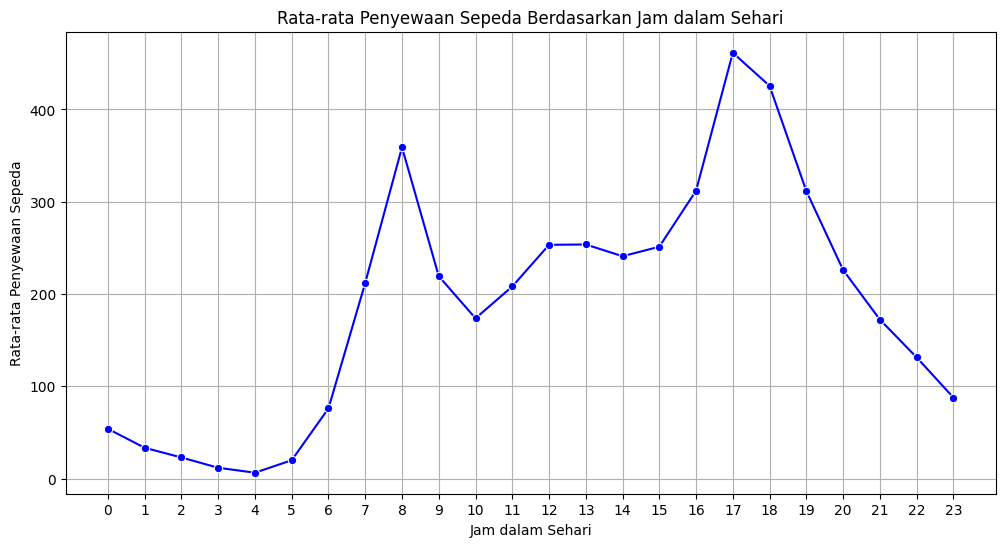

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime format
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# 1. Analisis Waktu Puncak Penyewaan (Rata-rata penyewaan per jam)
avg_rent_by_hour = hour_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rent_by_hour.index, y=avg_rent_by_hour.values, marker="o", color="b")
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.grid(True)
plt.show()


<ipython-input-6-2ae441cdf139>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


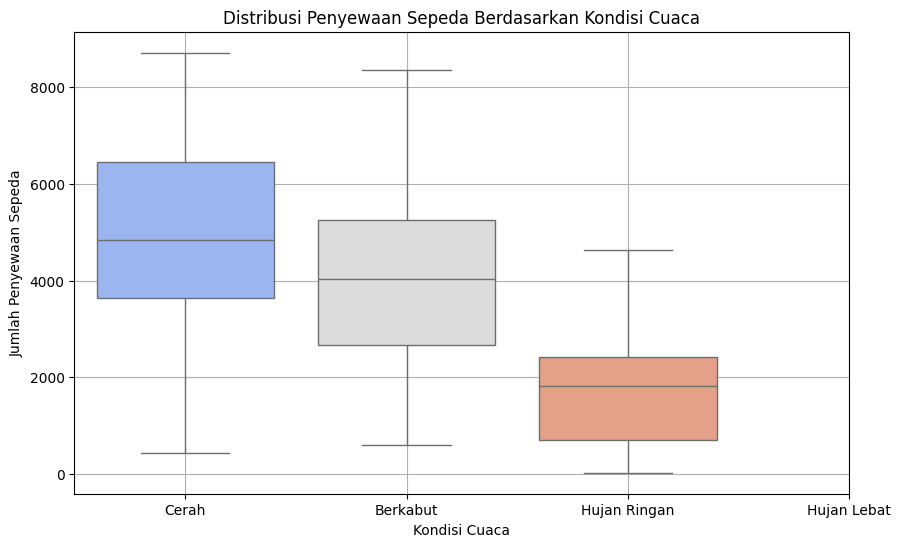

In [6]:

# 2. Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Hujan Lebat"])
plt.grid(True)
plt.show()


<ipython-input-7-2ae441cdf139>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


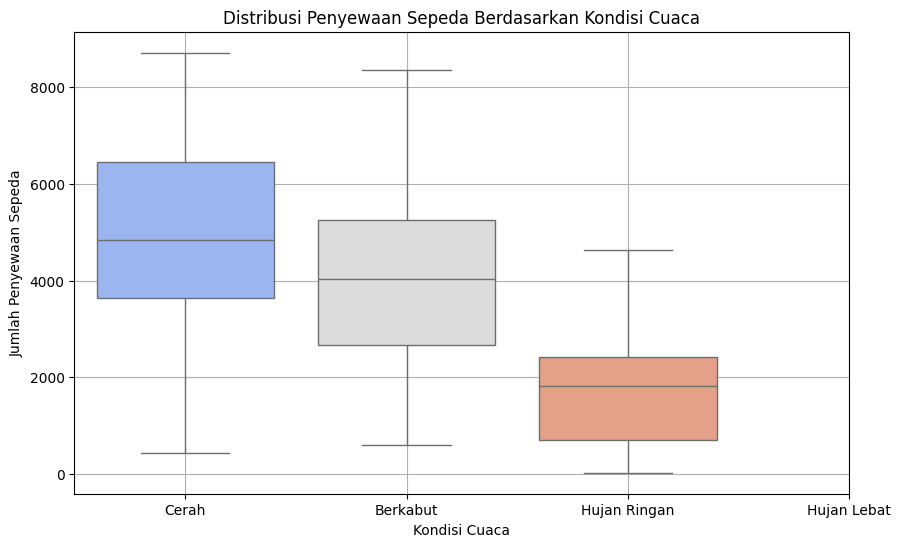

In [7]:

# 2. Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Hujan Lebat"])
plt.grid(True)
plt.show()


<ipython-input-8-d74b234ee931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=day_df, palette="viridis")


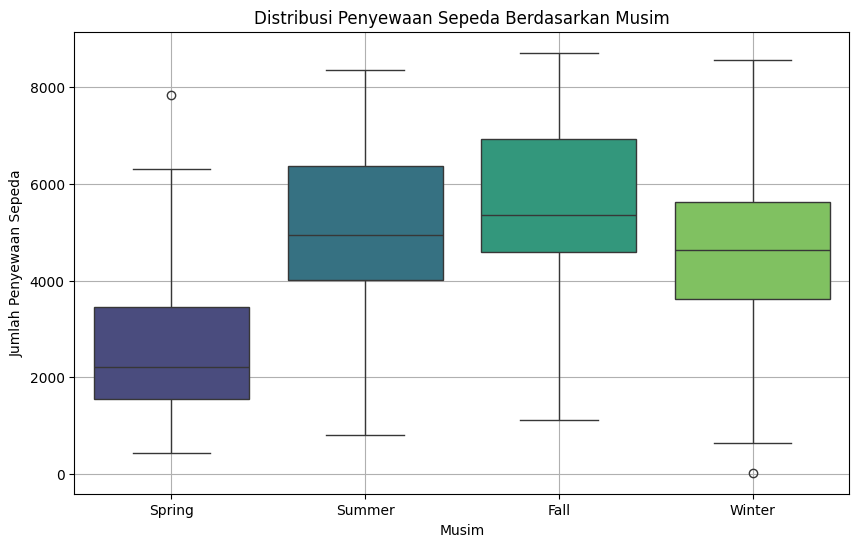

In [8]:
# 3. Analisis Pengaruh Musim terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x="season", y="cnt", data=day_df, palette="viridis")

plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.grid(True)
plt.show()

In [1]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [15]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Load dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Judul Aplikasi
st.title("Bike Sharing Data Analysis")

# Sidebar untuk memilih dataset
dataset_option = st.sidebar.selectbox("Pilih Dataset", ["Daily Data", "Hourly Data"])

# Menampilkan dataset yang dipilih
if dataset_option == "Daily Data":
    st.subheader("Daily Bike Sharing Data")
    st.write(day_df)
else:
    st.subheader("Hourly Bike Sharing Data")
    st.write(hour_df)

# Menampilkan statistik dasar
st.subheader("Statistik Deskriptif")
if dataset_option == "Daily Data":
    st.write(day_df.describe())
else:
    st.write(hour_df.describe())


Writing app.py
